In [1]:
!pip install seaborn

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)'))) - skipping


## Common ML models

In [2]:
!pip install scikit-learn

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)'))) - skipping


## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [4]:
laptop_data = pd.read_csv('ExerciseFiles/datasets/laptops.csv', encoding='ISO-8859-1', index_col=0)
laptop_data.head()

Company      Product   TypeName  Inches                    ScreenResolution  \
1   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
2   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
3      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
4   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
5   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
1        Intel Core i5 2.3GHz   8GB            128GB SSD   
2        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
3  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
4        Intel Core i7 2.7GHz  16GB            512GB SSD   
5        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight  Price_euros  
1  Intel Iris Plus Graphics 640  macOS  1.37kg      1339.69  
2        Intel HD Graphics 6000  macOS  1.34kg       898.94  
3         Intel HD Graphics 620  No OS  1.86kg       575.00  
4            AMD Radeon Pro 455  macOS  1.83kg      2537.45  
5  Intel Iris Plus Graphics 650  macOS  1.37kg      1803.60

In [5]:
laptop_data.shape

(1303, 12)

In [6]:
laptop_data.drop(['Product',
                  'ScreenResolution',
                  'Cpu',
                  'Memory',
                  'Gpu',
                  'Weight'], inplace=True, axis=1)

In [7]:
laptop_data.sample(10)

Company  TypeName  Inches   Ram       OpSys  Price_euros
631       HP  Notebook    15.6   4GB   Windows 7        932.0
1185  Lenovo  Notebook    15.6   4GB  Windows 10        468.0
683      MSI    Gaming    15.6  16GB  Windows 10       1294.0
1268    Dell  Notebook    15.6   4GB       Linux        324.0
553   Lenovo  Notebook    14.0   4GB  Windows 10        785.0
953     Dell    Gaming    17.3  16GB  Windows 10       2758.0
478       HP  Notebook    15.6   8GB  Windows 10       1154.0
491   Lenovo  Notebook    15.6   4GB  Windows 10        565.0
794      MSI    Gaming    14.0  16GB  Windows 10       1891.0
843   Lenovo  Notebook    14.0   8GB  Windows 10       1650.0

In [8]:
laptop_data['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [9]:
laptop_data.TypeName.value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

## Visualize Data

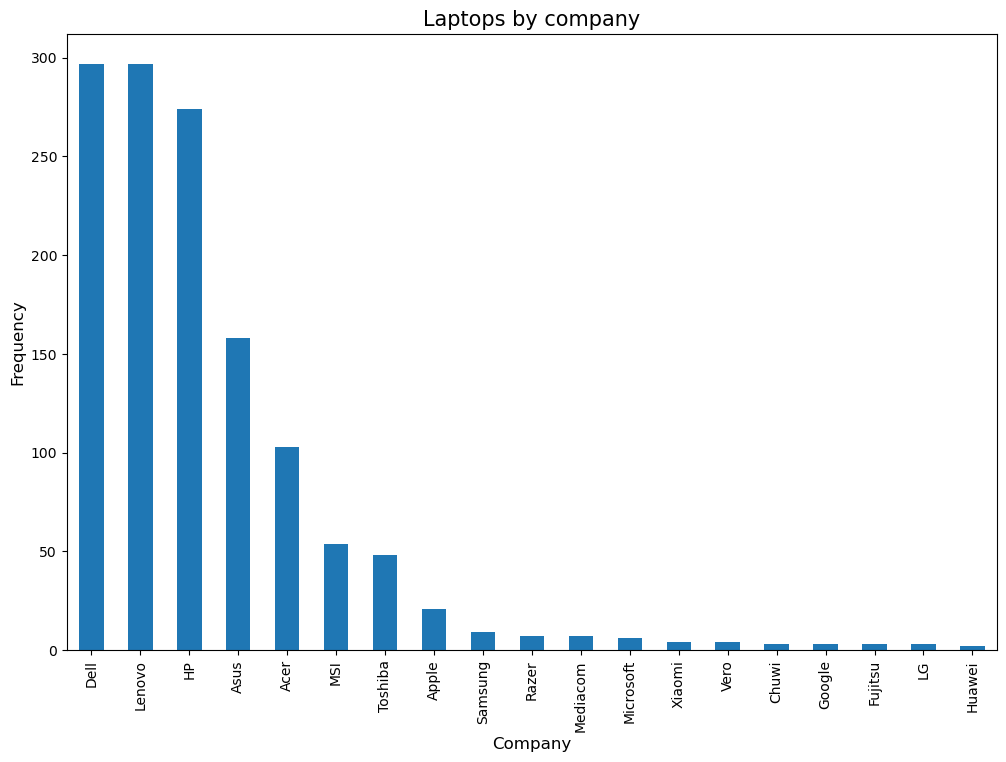

In [10]:
plt.figure(figsize=(12,8))
laptop_data['Company'].value_counts().plot(kind='bar')
plt.title('Laptops by company', fontsize=15)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<Axes: >

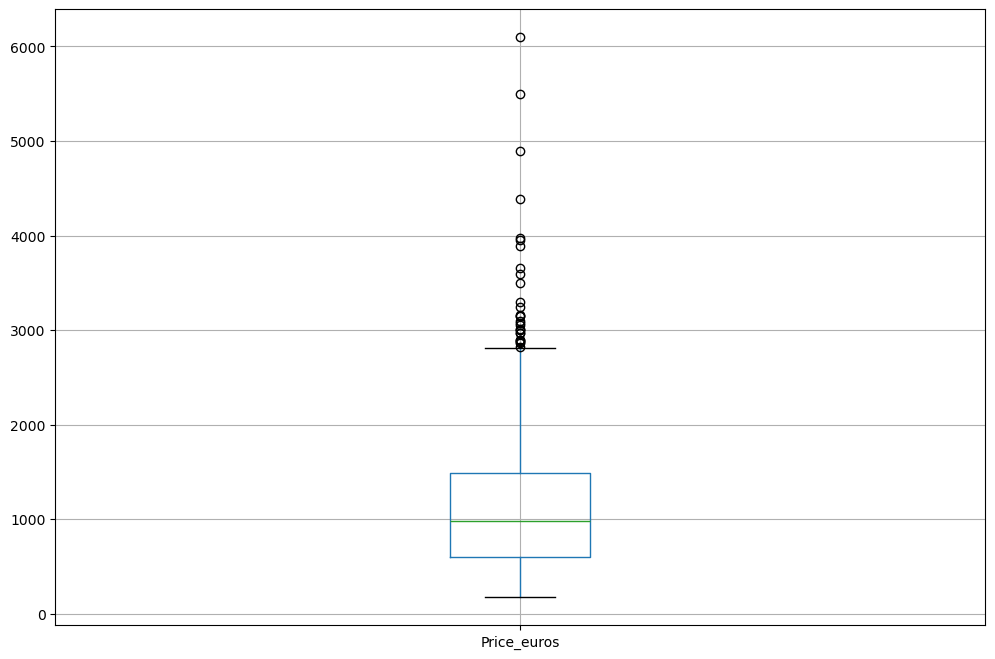

In [11]:
plt.figure(figsize=(12,8))
laptop_data[['Price_euros']].boxplot()

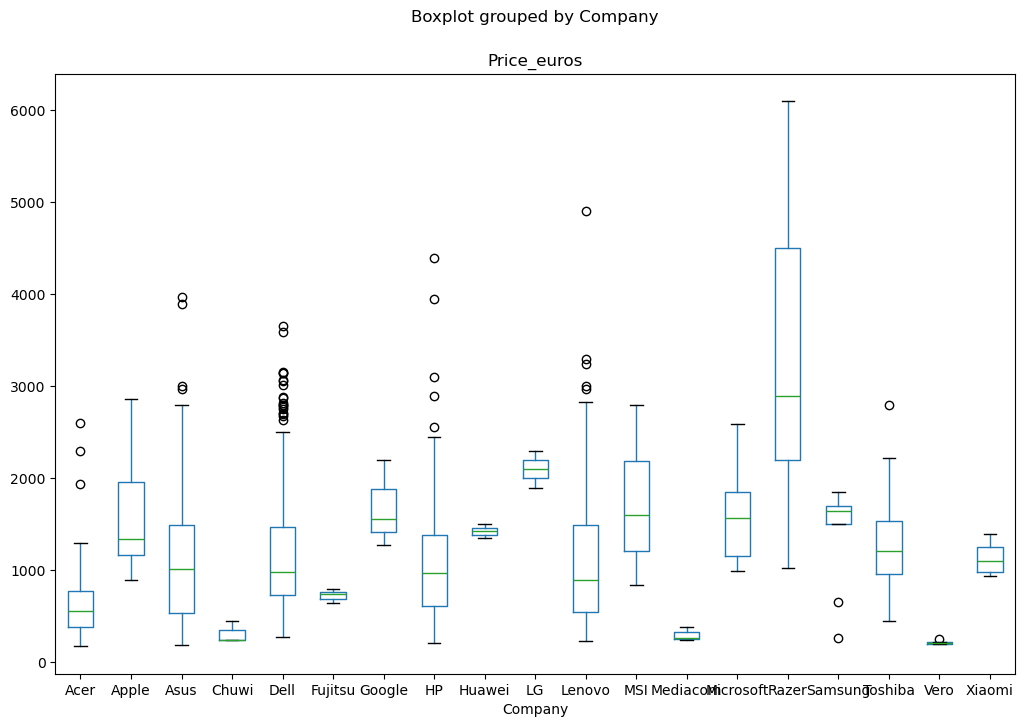

In [12]:
laptop_data.boxplot(by = 'Company', column = ['Price_euros'],
                    grid = False, figsize=(12,8))
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 51.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 54.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


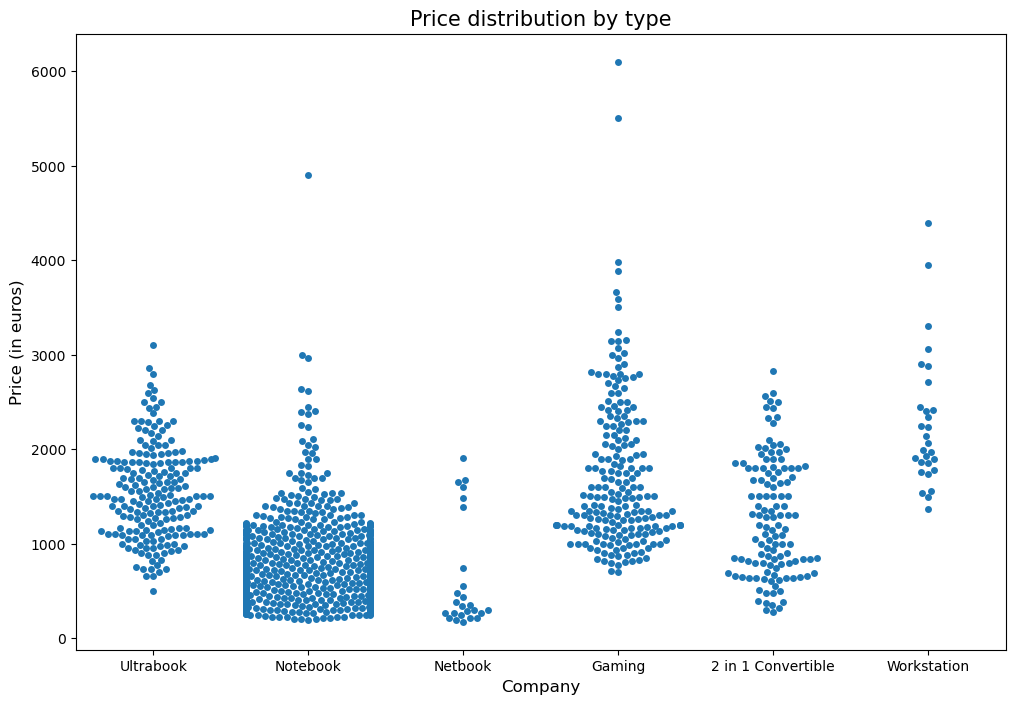

In [13]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='TypeName', y='Price_euros', data=laptop_data)
plt.title('Price distribution by type', fontsize=15)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Price (in euros)', fontsize=12)
plt.show()

## Simple price predition model

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
laptop_data['TypeName'] = label_encoder.fit_transform(laptop_data['TypeName'])

In [15]:
laptop_data.head()

Company  TypeName  Inches   Ram  OpSys  Price_euros
1   Apple         4    13.3   8GB  macOS      1339.69
2   Apple         4    13.3   8GB  macOS       898.94
3      HP         3    15.6   8GB  No OS       575.00
4   Apple         4    15.4  16GB  macOS      2537.45
5   Apple         4    13.3   8GB  macOS      1803.60

In [16]:
dummy_laptop_data = pd.get_dummies(laptop_data)
dummy_laptop_data.head()

TypeName  Inches  Price_euros  Company_Acer  Company_Apple  Company_Asus  \
1         4    13.3      1339.69         False           True         False   
2         4    13.3       898.94         False           True         False   
3         3    15.6       575.00         False          False         False   
4         4    15.4      2537.45         False           True         False   
5         4    13.3      1803.60         False           True         False   

   Company_Chuwi  Company_Dell  Company_Fujitsu  Company_Google  ...  Ram_8GB  \
1          False         False            False           False  ...     True   
2          False         False            False           False  ...     True   
3          False         False            False           False  ...     True   
4          False         False            False           False  ...    False   
5          False         False            False           False  ...     True   

   OpSys_Android  OpSys_Chrome OS  OpSys_Linux  OpSys_Mac OS X  OpSys_No OS  \
1          False            False        False           False        False   
2          False            False        False           False        False   
3          False            False        False           False         True   
4          False            False        False           False        False   
5          False            False        False           False        False   

   OpSys_Windows 10  OpSys_Windows 10 S  OpSys_Windows 7  OpSys_macOS  
1             False               False            False         True  
2             False               False            False         True  
3             False               False            False        False  
4             False               False            False         True  
5             False               False            False         True  

[5 rows x 40 columns]

In [18]:
dummy_laptop_data.shape

(1303, 40)

In [19]:
X = dummy_laptop_data.drop('Price_euros', axis=1)
y = dummy_laptop_data['Price_euros']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train.shape, X_test.shape

((1042, 39), (261, 39))

In [22]:
y_train.shape, y_test.shape

((1042,), (261,))

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [24]:
linear_regression.score(X_train, y_train)

0.6877009465273984

In [25]:
y_pred = linear_regression.predict(X_test)
r2_score(y_test, y_pred)

0.5942248967042246

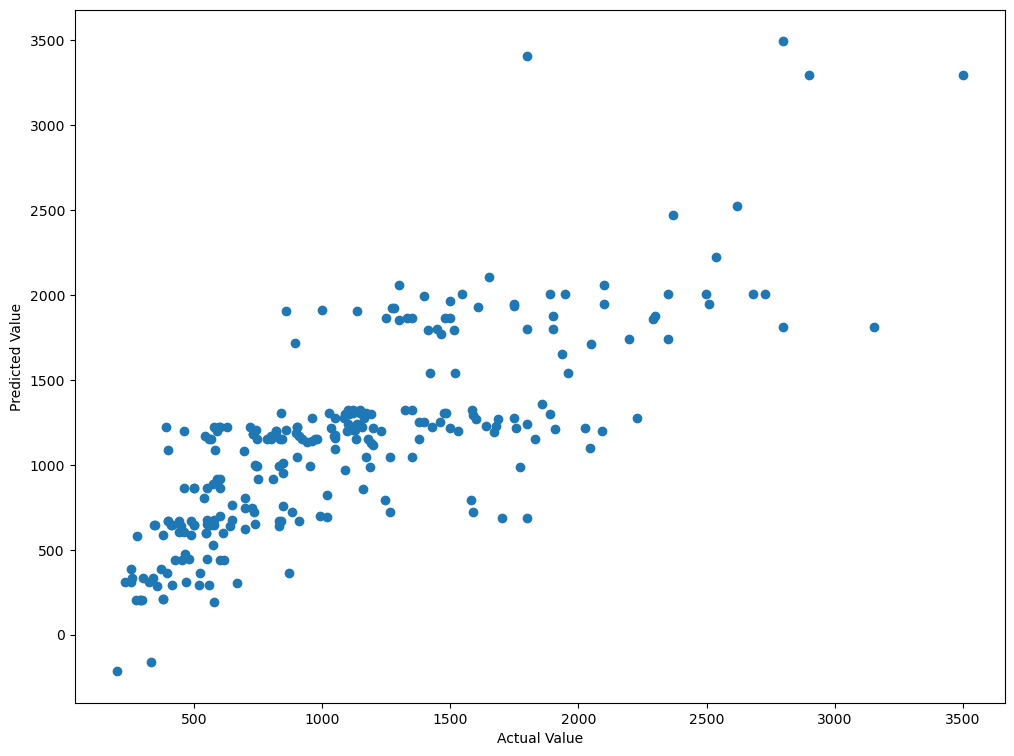

In [26]:
plt.figure(figsize = (12, 9))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()